In [1]:

import matplotlib.pyplot as plt
from scipy.signal import convolve, deconvolve
import scipy.stats as stats
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import scipy.signal as signal
import matplotlib.gridspec as gridspec
import importlib

from TpyC import (
    stylise_plot,
    chi2pdof,
    fit_angular,
    angular12_theta,
    conv
)



Chi-squared per degree of freedom: 0.000


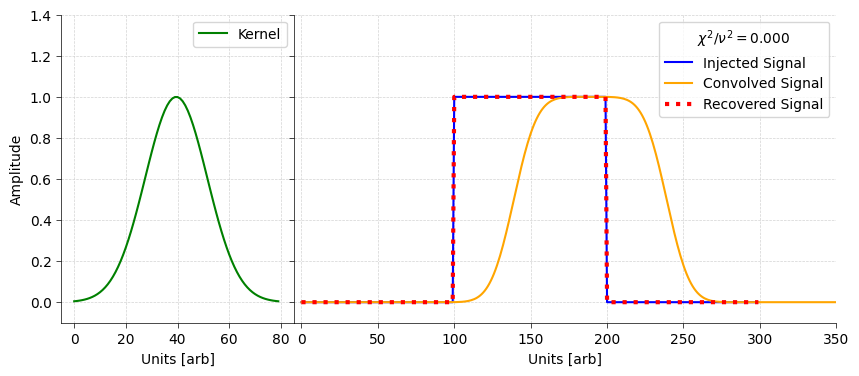

In [8]:
#########################################################
original_signal = np.repeat([0., 1., 0.], 100)
kernel = signal.windows.gaussian(80,12)
convolved_signal = np.convolve(original_signal, kernel, mode='full')
recovered_signal,  _ = scipy.signal.deconvolve( convolved_signal, kernel )
#########################################################
grid_spec = gridspec.GridSpec(1, 2, width_ratios=[3, 7])
plt.figure(figsize=(10, 4))  # Adjust the width and height of the figure as needed
plt.subplots_adjust(wspace=.0) # Adjust the horizontal spacing between subplots
ax1 = plt.subplot(grid_spec[0])
ax2 = plt.subplot(grid_spec[1])

ax1.plot(kernel, label='Kernel', marker='', color='green')
ax1.set_xlabel('Units [arb]')
ax2.set_xlabel('Units [arb]')
ax1.set_ylabel('Amplitude')
ax1.set_ylim(-0.1,1.4)
ax1.set_xlim(-5,85)
ax1.legend(  fontsize='medium', title_fontsize='medium', loc='upper right')
stylise_plot(ax1)
ax2.plot(original_signal, label='Injected Signal', marker='', color='blue')
ax2.set_xlabel('Units [arb]')

ax2.plot(convolved_signal/np.sum(kernel), label='Convolved Signal', marker='', color='orange')
ax2.set_ylim(-0.1,1.4)
ax2.set_yticklabels([])  # Turn off y tick labels
ax2.plot(recovered_signal,  linewidth=3,label='Recovered Signal', marker='', color='red', linestyle='dotted',zorder=3)
ax2.set_xlim(-5,350)
stylise_plot(ax2)

chi_squared_per_dof = chi2pdof(original_signal,recovered_signal)
plt.legend(title=f'$\chi^2/\\nu^2={chi_squared_per_dof:.3f}$', fontsize='medium', title_fontsize='medium', loc='upper right')
print(f"Chi-squared per degree of freedom: {chi_squared_per_dof:.3f}")

plt.savefig('convole_full.png')
plt.show()

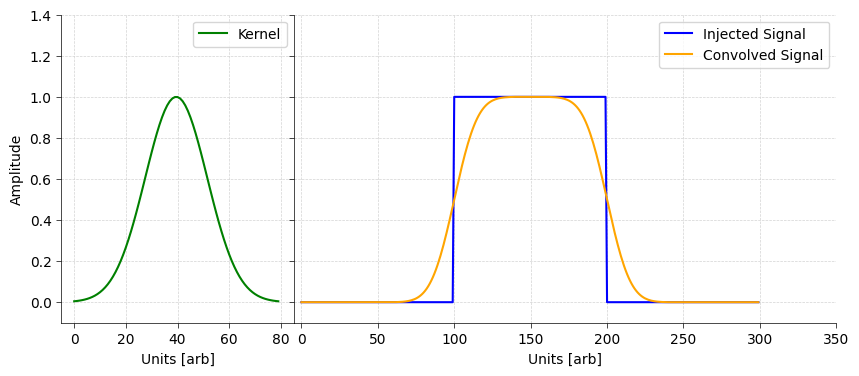

In [3]:
#########################################################
original_signal = np.repeat([0., 1., 0.], 100)
kernel = signal.windows.gaussian(80,12)

convolved_signal = np.convolve(original_signal, kernel, mode='same')
recovered_signal,  _ = scipy.signal.deconvolve( convolved_signal, kernel )
#########################################################
grid_spec = gridspec.GridSpec(1, 2, width_ratios=[3, 7])
plt.figure(figsize=(10, 4))  # Adjust the width and height of the figure as needed
plt.subplots_adjust(wspace=.0) # Adjust the horizontal spacing between subplots
ax1 = plt.subplot(grid_spec[0])
ax2 = plt.subplot(grid_spec[1])

ax1.plot(kernel, label='Kernel', marker='', color='green')
ax1.set_xlabel('Units [arb]')
ax1.set_ylabel('Amplitude')
ax1.legend(  fontsize='medium', title_fontsize='medium', loc='upper right')
ax1.set_ylim(-0.1,1.4)
ax1.set_xlim(-5,85)
stylise_plot(ax1)


ax2.plot(original_signal, label='Injected Signal', marker='', color='blue')
ax2.set_xlabel('Units [arb]')
ax2.plot(convolved_signal/np.sum(kernel), label='Convolved Signal', marker='', color='orange')
ax2.legend(  fontsize='medium', title_fontsize='medium', loc='upper right')
ax2.set_ylim(-0.1,1.4)
ax2.set_xlim(-5,350)
stylise_plot(ax2)

#ax2.set_yticks([])  # Turn off y ticks
ax2.set_yticklabels([])  # Turn off y tick labels
#ax2.plot(recovered_signal, label='Recovered Signal', marker='', color='red', linestyle='dotted',zorder=3)
ax2.legend(  fontsize='medium', title_fontsize='medium', loc='upper right')


plt.savefig('convole_same.png')
plt.show()


#########################################################

Chi-squared per degree of freedom: 0.000


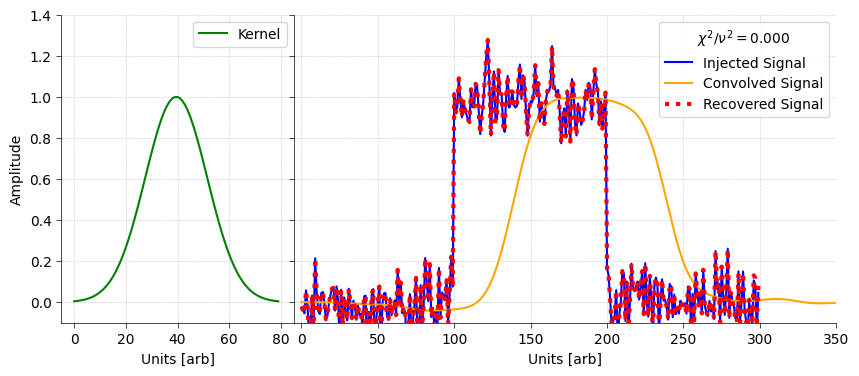

In [4]:
#########################################################
original_signal = np.repeat([0., 1., 0.], 100)

mean = 0  # Mean of the Gaussian distribution
std = 0.1  # Standard deviation of the Gaussian distribution

noise = np.random.normal(mean, std, len(original_signal))
original_signal = original_signal + noise


kernel = signal.windows.gaussian(80,12)
convolved_signal = np.convolve(original_signal, kernel, mode='full')
recovered_signal,  _ = scipy.signal.deconvolve( convolved_signal, kernel )
#########################################################
grid_spec = gridspec.GridSpec(1, 2, width_ratios=[3, 7])
plt.figure(figsize=(10, 4))  # Adjust the width and height of the figure as needed
plt.subplots_adjust(wspace=.0) # Adjust the horizontal spacing between subplots
ax1 = plt.subplot(grid_spec[0])
ax2 = plt.subplot(grid_spec[1])

ax1.plot(kernel, label='Kernel', marker='', color='green')
ax1.set_xlabel('Units [arb]')
ax1.set_ylabel('Amplitude')
ax1.legend( loc='upper right',fontsize='medium', title_fontsize='medium')
ax1.set_ylim(-0.1,1.4)
ax1.set_xlim(-5,85)
stylise_plot(ax1)

ax2.plot(original_signal, label='Injected Signal', marker='', color='blue')
ax2.set_xlabel('Units [arb]')
ax2.plot(convolved_signal/np.sum(kernel), label='Convolved Signal', marker='', color='orange')
ax2.legend( loc='upper right')
ax2.set_ylim(-0.1,1.4)
#ax2.set_yticks([])  # Turn off y ticks
ax2.set_yticklabels([])  # Turn off y tick labels
ax2.plot(recovered_signal,  linewidth=3,label='Recovered Signal', marker='', color='red', linestyle='dotted',zorder=3)
ax2.legend( loc='upper right')
ax2.set_xlim(-5,350)
stylise_plot(ax2)

#########################################################
# Create a numpy array from a Python list

chi_squared_per_dof = chi2pdof(original_signal,recovered_signal)
print(f"Chi-squared per degree of freedom: {chi_squared_per_dof:.3f}")

plt.legend(title=f'$\chi^2/\\nu^2={chi_squared_per_dof:.3f}$', fontsize='medium', title_fontsize='medium', loc='upper right')

plt.savefig('convole_noise.png')
plt.show()

number of points:  40000
x start:  0.0
x start:  3.141592653589793
range of x:  3.141592653589793
degrees to conv:  18
radians to conv:  0.3141592653589793
radians per X:  7.853981633974483e-05
Xs per radian:  12732.395447351628
X to conv:  4000.0
X to SD:  1698.6436005760381


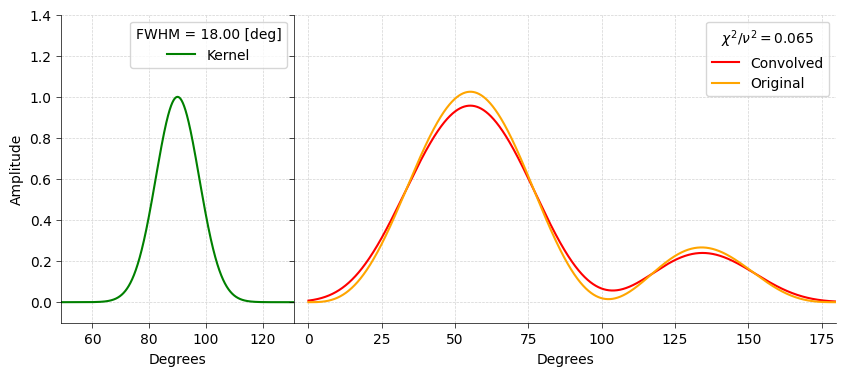

In [32]:
from scipy.optimize import curve_fit

x = np.linspace(0, np.pi, 40000)
dist=angular12_theta(0.1,0.4,phi=np.deg2rad(19))

def conv(x,degrees,y):

    numberOfPoints = len(x)
    startXval = x[0]
    endXval =  x[len(x)-1]
    rangeOfVals  = endXval - startXval
    degreesToConv = degrees
    radiansToConv = np.deg2rad(degreesToConv)
    radiansPerX = rangeOfVals / numberOfPoints
    XPerRad =  numberOfPoints/rangeOfVals 
    XtoConv = XPerRad*radiansToConv
    Res_to_SD = lambda fwhm: fwhm / (2 * np.sqrt(2 * np.log(2)))
    SD_X = Res_to_SD(XtoConv)


    kernel = signal.windows.gaussian(numberOfPoints,SD_X)
    convolved_signal = np.convolve(y, kernel, mode='same')
    convolved_signal=convolved_signal/sum(kernel)
    
    x2 = np.linspace(0, 180, numberOfPoints)

    grid_spec = gridspec.GridSpec(1, 2, width_ratios=[3, 7])
    plt.figure(figsize=(10, 4))  # Adjust the width and height of the figure as needed
    plt.subplots_adjust(wspace=0.000) # Adjust the horizontal spacing between subplots
    ax1 = plt.subplot(grid_spec[0])
    ax2 = plt.subplot(grid_spec[1])

    ax1.plot(x2,kernel, label='Kernel', marker='', color='green')
    ax2.plot(x2,convolved_signal, label='Convolved', marker='', color='red')
    ax2.plot(x2,y, label='Original', marker='', color='orange')

    ax2.legend(loc='upper right',fontsize='medium', title_fontsize='medium')


    print('number of points: ',numberOfPoints)
    print('x start: ',startXval)
    print('x start: ',endXval)
    print('range of x: ',rangeOfVals)
    print('degrees to conv: ',degreesToConv)
    print('radians to conv: ',radiansToConv)
    print('radians per X: ',radiansPerX)
    print('Xs per radian: ',XPerRad)
    print('X to conv: ',XtoConv)
    print('X to SD: ',SD_X)


    def gaussian(x, amplitude, center, sigma):
        return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))
    popt, _ = curve_fit(gaussian, x2,kernel, p0=[1, 90, 0.6], method='lm')
    amplitude_fit, center_fit, sigma_fit = popt
    fwhm_fit = 2 * np.sqrt(2 * np.log(2)) * sigma_fit
    ax1.legend(title=f'FWHM = {fwhm_fit:.2f} [deg]', fontsize='medium', title_fontsize='medium', loc='upper right')


    ax2.set_yticklabels([])  # Turn off y tick labels


    ax1.set_ylim(-0.1,1.4)
    ax1.set_xlim(85-fwhm_fit*2,95+fwhm_fit*2)
    ax2.set_ylim(-0.1,1.4)
    ax2.set_xlim(-5,180)

    stylise_plot(ax1)
    stylise_plot(ax2)

    ax1.set_xlabel('Degrees')
    ax2.set_xlabel('Degrees')
    ax1.set_ylabel('Amplitude')

    chi_squared_per_dof = chi2pdof(convolved_signal,y)

    plt.legend(title=f'$\chi^2/\\nu^2={chi_squared_per_dof:.3f}$', fontsize='medium', title_fontsize='medium', loc='upper right')

    #plt.savefig('distro_conv_5.png')



conv(x,18, dist.pdf(x))


"\n    ax1.set_ylim(-0.1,1.4)\n    ax1.set_xlim(85-fwhm_fit*2,95+fwhm_fit*2)\n    ax2.set_ylim(-0.1,1.4)\n    ax2.set_xlim(-5,180)\n\n    stylise_plot(ax1)\n    stylise_plot(ax2)\n\n    ax1.set_xlabel('Degrees')\n    ax2.set_xlabel('Degrees')\n    ax1.set_ylabel('Amplitude')"

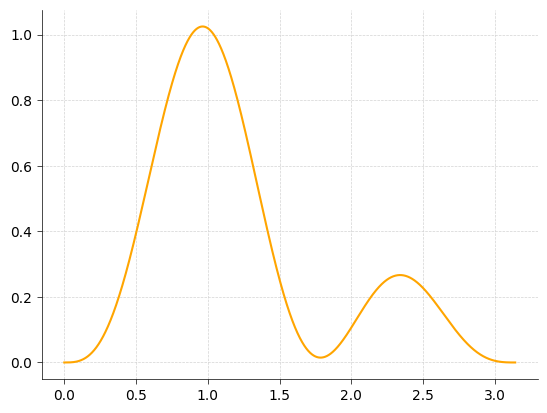

In [4]:

import TpyC as pyC
importlib.reload(pyC)

dist = angular12_theta(0.1,0.4,phi=np.deg2rad(19))
x = np.linspace(0, np.pi, 40000)
y = dist.pdf(x)


convolved_signal = conv(x, y, 40)

fig, ax = plt.subplots()
ax.plot(x,y,color='orange')
ax.plot(x,y,color='red')
stylise_plot(ax)


'''
    ax1.set_ylim(-0.1,1.4)
    ax1.set_xlim(85-fwhm_fit*2,95+fwhm_fit*2)
    ax2.set_ylim(-0.1,1.4)
    ax2.set_xlim(-5,180)

    stylise_plot(ax1)
    stylise_plot(ax2)

    ax1.set_xlabel('Degrees')
    ax2.set_xlabel('Degrees')
    ax1.set_ylabel('Amplitude')'''